In [4]:
import sympy as sym
from sympy import latex, sqrt, cos, sin, diff
from IPython.display import display, Math, Latex
from Electromagnetics import Misc

ksi, eta, phi = sym.symbols(r'\xi \eta \phi', real=True) 
d = sym.Symbol('d', real=True, positive=True)
m = sym.Symbol('m')

print("Coordinate transformation:")
x = d/2*sqrt((1 - eta**2))*sqrt((ksi**2 - 1))*cos(phi)
y = d/2*sqrt((1 - eta**2))*sqrt((ksi**2 - 1))*sin(phi)
z = d/2*eta*ksi


display(Math("x = " + latex(x)))
display(Math("y = " + latex(y)))
display(Math("z = " + latex(z)))

h_eta = (sqrt(diff(x, eta)**2 + diff(y, eta)**2 + diff(z, eta)**2)).simplify()
h_ksi = (sqrt(diff(x, ksi)**2 + diff(y, ksi)**2 + diff(z, ksi)**2)).simplify()
h_phi = (sqrt(diff(x, phi)**2 + diff(y, phi)**2 + diff(z, phi)**2)).simplify()

print("Metric coefficients:")
display(Math(r"h_\eta = " + latex(h_eta)))
display(Math(r"h_\xi = " + latex(h_ksi)))
display(Math(r"h_\phi = " + latex(h_phi)))

h_eta = d/2*sqrt(ksi**2 - eta**2)/sqrt(1 - eta**2)
h_ksi = d/2*sqrt(ksi**2 - eta**2)/sqrt(ksi**2 - 1)
h_phi = d/2*sqrt(1 - eta**2)*sqrt(ksi**2 - 1)

print("sqrt's rearranged:")
display(Math(r"h_\eta = " + latex(h_eta)))
display(Math(r"h_\xi = " + latex(h_ksi)))
display(Math(r"h_\phi = " + latex(h_phi)))

S_mn = sym.Function(r"S_{mn}")(eta)
R_mn = sym.Function(r"R_{mn}")(ksi)

psi_mn_e = S_mn*R_mn*cos(m*phi)
psi_mn_o = S_mn*R_mn*sin(m*phi)

print("Spheroidal wave functions:")
display(Math(r"\psi_{mn}^e= " + latex(psi_mn_e)))
display(Math(r"\psi_{mn}^o= " + latex(psi_mn_o)))


x_hat = sym.Matrix([-eta*sqrt((ksi**2 - 1))/sqrt((ksi**2 - eta**2))*cos(phi), 
                    +ksi*sqrt((1 - eta**2))/sqrt((ksi**2 - eta**2))*cos(phi), 
                    -sin(phi)])
y_hat = sym.Matrix([-eta*sqrt((ksi**2 - 1))/sqrt((ksi**2 - eta**2))*sin(phi), 
                    +ksi*sqrt((1 - eta**2))/sqrt((ksi**2 - eta**2))*sin(phi), 
                    +cos(phi)])
z_hat = sym.Matrix([+ksi*sqrt((1 - eta**2))/sqrt((ksi**2 - eta**2)),
                    +eta*sqrt((ksi**2 - 1))/sqrt((ksi**2 - eta**2)),
                    0])
print("basis vectors:")
display(Math(r"\hat x = " + latex(x_hat)))
display(Math(r"\hat y = " + latex(y_hat)))
display(Math(r"\hat z = " + latex(z_hat)))

#eta_ksi_phi_hat = sym.Matrix([x_hat.T, y_hat.T, z_hat.T]).inv("LU")
#display(Math(r"\hat {\eta\xi\phi} = " + latex(eta_ksi_phi_hat)))

# transformation matrix
A_coord = sym.Matrix([[diff(x, eta), diff(x, ksi), diff(x, phi)],
                      [diff(y, eta), diff(y, ksi), diff(y, phi)],
                      [diff(z, eta), diff(z, ksi), diff(z, phi)]])
display(Math(r"A = " + latex(A_coord)))



Coordinate transformation:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Metric coefficients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

sqrt's rearranged:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Spheroidal wave functions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

basis vectors:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
## inverse coordinate transform

import sympy as sym
from sympy import latex, sqrt, cos, sin, diff, atan
from IPython.display import display, Math, Latex
from Electromagnetics import Misc

x, y, z = sym.symbols("x y z", real=True)
d = sym.Symbol('d', real=True, positive=True)

ksi = (sqrt(x**2 + y**2 + (z + d/2)**2) + sqrt(x**2 + y**2 + (z - d/2)**2))/d
eta = (sqrt(x**2 + y**2 + (z + d/2)**2) - sqrt(x**2 + y**2 + (z - d/2)**2))/d
phi = atan(y/x)

# transformation matrix
A_coord = sym.Matrix([[diff(eta, x), diff(eta, y), diff(eta, z)],
                      [diff(ksi, x), diff(ksi, y), diff(ksi, z)],
                      [diff(phi, x), diff(phi, y), diff(phi, z)]])
display(Math(r"A = " + latex(A_coord)))

ksi, eta, phi = sym.symbols(r'\xi \eta \phi', real=True) 
rho = sym.Symbol(r'\rho', real=True)
A_coord = A_coord.subs([(sqrt(x**2 + y**2 + (z + d/2)**2), (ksi + eta)*d), (sqrt(x**2 + y**2 + (z - d/2)**2), (ksi - eta)*d)])
A_coord = A_coord.subs(1+y**2/x**2, rho**2/x**2)
display(Math(r"A = " + latex(A_coord)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [112]:
grad_psi_mn_e = sym.Matrix([1/h_eta*diff(psi_mn_e, eta),
                         1/h_ksi*diff(psi_mn_e, ksi),
                         1/h_phi*diff(psi_mn_e, phi)
                        ])
grad_psi_mn_o = sym.Matrix([1/h_eta*diff(psi_mn_o, eta),
                         1/h_ksi*diff(psi_mn_o, ksi),
                         1/h_phi*diff(psi_mn_o, phi)
                        ])

print("gradients:")
display(Math(r"\nabla \psi_{mn}^e = " + latex(grad_psi_mn_e)))
display(Math(r"\nabla \psi_{mn}^o = " + latex(grad_psi_mn_o)))


gradients:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [113]:
def GetCrossProd(a, b):
    return sym.Matrix([(a[1]*b[2] - a[2]*b[1]).simplify(),
                       (a[2]*b[0] - a[0]*b[2]).simplify(),
                       (a[0]*b[1] - a[1]*b[0]).simplify()
                      ])


M_mn_e_x = GetCrossProd(grad_psi_mn_e, x_hat)
M_mn_e_y = GetCrossProd(grad_psi_mn_e, y_hat)
M_mn_e_z = GetCrossProd(grad_psi_mn_e, z_hat)

print("Vector wave functions:")
display(Math(r"M_{mn}^{ex} = " + latex(M_mn_e_x)))
display(Math(r"M_{mn}^{ey} = " + latex(M_mn_e_y)))
display(Math(r"M_{mn}^{ez} = " + latex(M_mn_e_z)))


Vector wave functions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [114]:

M_mn_o_x = GetCrossProd(grad_psi_mn_o, x_hat)
M_mn_o_y = GetCrossProd(grad_psi_mn_o, y_hat)
M_mn_o_z = GetCrossProd(grad_psi_mn_o, z_hat)

print("Vector wave functions:")
display(Math(r"M_{mn}^{ox} = " + latex(M_mn_o_x)))
display(Math(r"M_{mn}^{oy} = " + latex(M_mn_o_y)))
display(Math(r"M_{mn}^{oz} = " + latex(M_mn_o_z)))


Vector wave functions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [115]:
M_mplus1n_e_plus = (M_mn_e_x - M_mn_o_y)/2
M_mplus1n_o_plus = (M_mn_o_x + M_mn_e_y)/2
M_mminus1n_e_minus = (M_mn_e_x + M_mn_o_y)/2
M_mminus1n_o_minus = (M_mn_o_x - M_mn_e_y)/2

from Electromagnetics.Misc import SymMatrixSimplify

M_mplus1n_e_plus = SymMatrixSimplify(M_mplus1n_e_plus)
M_mplus1n_o_plus = SymMatrixSimplify(M_mplus1n_o_plus)
M_mminus1n_e_minus = SymMatrixSimplify(M_mminus1n_e_minus)
M_mminus1n_o_minus = SymMatrixSimplify(M_mminus1n_o_minus)

print("Vector wave functions:")
display(Math(r"M_{m+1,n}^{e+} = " + latex(M_mplus1n_e_plus)))
display(Math(r"M_{m+1,n}^{o+} = " + latex(M_mplus1n_o_plus)))
display(Math(r"M_{m-1,n}^{e-} = " + latex(M_mminus1n_e_minus)))
display(Math(r"M_{m-1,n}^{o-} = " + latex(M_mminus1n_o_minus)))


Vector wave functions:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [116]:
from sympy.utilities.lambdify import lambdastr

def GetLambdaStr(expr):
    string = lambdastr((m, n, eta, ksi, phi, d), expr)
    string = string.replace('# Not supported in Python:\n  # Derivative\n  # Derivative\n  # R_{mn}\n  # S_{mn}\n', '')
    string = string.replace('# Not supported in Python:\n  # Derivative\n  # R_{mn}\n  # S_{mn}\n', '')
    string = string.replace('# Not supported in Python:\n  # R_{mn}\n  # S_{mn}\n', '')
    string = replace_whole_word(string, r'\eta', 'eta')
    string = replace_whole_word(string, r'\xi', 'ksi')
    string = replace_whole_word(string, r'\phi', 'phi')
    string = replace_whole_word(string, r'math', 'np')
    string = replace_whole_word(string, r'sqrt', 'np.sqrt')
    string = replace_whole_word(string, 'Derivative(S_{mn}(eta), eta)', 'pro_ang1(m, n, c, eta)[1]')
    string = replace_whole_word(string, 'S_{mn}(eta)', 'pro_ang1(m, n, c, eta)[0]')
    string = replace_whole_word(string, 'Derivative(R_{mn}(ksi), ksi)', 'GetDerivativeRadialFunc(4, m, n, c, ksi)')
    string = replace_whole_word(string, 'R_{mn}(ksi)', 'GetRadialFunc(4, m, n, c, ksi)')
    return string


print("="*50)
print("M_mplus1n_o_plus")
print("eta : ", GetLambdaStr(M_mplus1n_o_plus[0]))
print("ksi : ", GetLambdaStr(M_mplus1n_o_plus[1]))
print("phi : ", GetLambdaStr(M_mplus1n_o_plus[2]))

print("="*50)
print("M_mminus1n_o_minus")
print("eta : ", GetLambdaStr(M_mminus1n_o_minus[0]))
print("ksi : ", GetLambdaStr(M_mminus1n_o_minus[1]))
print("phi : ", GetLambdaStr(M_mminus1n_o_minus[2]))

print('='*50)
print("M_mn_o_z")
print("eta : ", GetLambdaStr(M_mn_o_z[0]))
print("ksi : ", GetLambdaStr(M_mn_o_z[1]))
print("phi : ", GetLambdaStr(M_mn_o_z[2]))


M_mplus1n_o_plus
eta :  lambda m,n,\eta,\xi,\phi,d: (  (ksi**2*GetDerivativeRadialFunc(4, m, n, c, ksi) - ksi*m*GetRadialFunc(4, m, n, c, ksi) - GetDerivativeRadialFunc(4, m, n, c, ksi))*pro_ang1(m, n, c, eta)[0]*np.cos(phi*(m + 1))/(d*np.sqrt(-eta**2 + ksi**2)*np.sqrt(ksi**2 - 1)))
ksi :  lambda m,n,\eta,\xi,\phi,d: (  (eta**2*pro_ang1(m, n, c, eta)[1] - eta*m*pro_ang1(m, n, c, eta)[0] - pro_ang1(m, n, c, eta)[1])*GetRadialFunc(4, m, n, c, ksi)*np.cos(phi*(m + 1))/(d*np.sqrt(-eta**2 + 1)*np.sqrt(-eta**2 + ksi**2)))
phi :  lambda m,n,\eta,\xi,\phi,d: (  -(eta*(ksi**2 - 1)*pro_ang1(m, n, c, eta)[0]*GetDerivativeRadialFunc(4, m, n, c, ksi) - ksi*(eta**2 - 1)*GetRadialFunc(4, m, n, c, ksi)*pro_ang1(m, n, c, eta)[1])*np.sin(phi*m + phi)/(d*(eta**2 - ksi**2)))
M_mminus1n_o_minus
eta :  lambda m,n,\eta,\xi,\phi,d: (  (-ksi**2*GetDerivativeRadialFunc(4, m, n, c, ksi) - ksi*m*GetRadialFunc(4, m, n, c, ksi) + GetDerivativeRadialFunc(4, m, n, c, ksi))*pro_ang1(m, n, c, eta)[0]*np.cos(phi*(m - 1)

In [117]:

def Get_Einc_harmonics_eta(vbose = True):
    expr = M_mn_e_y[0]
    if vbose:
        print("incident eta harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(cos(phi)*cos(m*phi), (cos((m-1)*phi) + cos((m+1)*phi))/2)
    expr = expr.subs(sin(phi)*sin(m*phi), (cos((m-1)*phi) - cos((m+1)*phi))/2)
    if vbose:
        display(Math(r"expr = " + latex(expr)))

    coeff_m_p1 = expr.subs([(cos((m-1)*phi), 0), (cos((m+1)*phi), 1)])
    coeff_m_m1 = expr.subs([(cos((m-1)*phi), 1), (cos((m+1)*phi), 0)])

    if vbose:
        display(Math(r"cos((m+1)\phi)~~~factor = " + latex(coeff_m_p1)))
        display(Math(r"cos((m-1)\phi)~~~factor = " + latex(coeff_m_m1)))
        
    return coeff_m_p1, coeff_m_m1

def Get_Einc_harmonics_phi(vbose = True):
    expr = M_mn_e_y[2]
    if vbose:
        print("incident phi harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(sin(phi)*cos(m*phi), (sin((m+1)*phi) - sin((m-1)*phi))/2)
    expr = expr.subs(cos(phi)*sin(m*phi), (sin((m+1)*phi) + sin((m-1)*phi))/2)
    if vbose:
        display(Math(r"expr = " + latex(expr)))

    coeff_m_p1 = expr.subs([(sin((m-1)*phi), 0), (sin((m+1)*phi), 1)])
    coeff_m_m1 = expr.subs([(sin((m-1)*phi), 1), (sin((m+1)*phi), 0)])

    if vbose:
        display(Math(r"sin((m+1)\phi)~~~factor = " + latex(coeff_m_p1)))
        display(Math(r"sin((m-1)\phi)~~~factor = " + latex(coeff_m_m1)))
        
    return coeff_m_p1, coeff_m_m1

def GetTM_Moplus_harmonics_eta(vbose = True):
    expr = M_mplus1n_o_plus[0]
    if vbose:
        print("TM M^+_o eta harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(m*phi + phi, (m+1)*phi)

    coeff_m_p1 = expr.subs([(cos((m+1)*phi), 1)])
    
    if vbose:
        display(Math(r"cos((m+1)\phi)~~~factor = " + latex(coeff_m_p1)))
        
    return coeff_m_p1

def GetTM_Moplus_harmonics_phi(vbose = True):
    expr = M_mplus1n_o_plus[2]
    if vbose:
        print("TM M^+_o phi harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(m*phi + phi, (m+1)*phi)

    coeff_m_p1 = expr.subs([(sin((m+1)*phi), 1)])
    
    if vbose:
        display(Math(r"sin((m+1)\phi)~~~factor = " + latex(coeff_m_p1)))
        
    return coeff_m_p1

def GetTM_Mominus_harmonics_eta(vbose = True):
    expr = M_mminus1n_o_minus[0]
    if vbose:
        print("TM M^-_o eta harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(m*phi - phi, (m-1)*phi)

    coeff_m_m1 = expr.subs([(cos((m-1)*phi), 1)])
    
    if vbose:
        display(Math(r"cos((m-1)\phi)~~~factor = " + latex(coeff_m_m1)))
        
    return coeff_m_m1

def GetTM_Mominus_harmonics_phi(vbose = True):
    expr = M_mminus1n_o_minus[2]
    if vbose:
        print("TM M^-_o phi harmonics:")
        display(Math(r"expr = " + latex(expr)))

    expr = expr.subs(m*phi - phi, (m-1)*phi)

    coeff_m_m1 = expr.subs([(sin((m-1)*phi), 1)])
    
    if vbose:
        display(Math(r"sin((m-1)\phi)~~~factor = " + latex(coeff_m_m1)))
        
    return coeff_m_m1


def GetTM_Mzo_harmonics_eta(vbose = True):
    expr = M_mn_o_z[0]
    if vbose:
        print("TM M^z_o eta harmonics:")
        display(Math(r"expr = " + latex(expr)))

    coeff_m = expr.subs([(cos(m*phi), 1)])
    
    if vbose:
        display(Math(r"cos(m\phi)~~~factor = " + latex(coeff_m)))
        
    return coeff_m

def GetTM_Mzo_harmonics_phi(vbose = True):
    expr = M_mn_o_z[2]
    if vbose:
        print("TM M^z_o phi harmonics:")
        display(Math(r"expr = " + latex(expr)))

    coeff_m = expr.subs([(sin(m*phi), 1)])
    
    if vbose:
        display(Math(r"sin(m\phi)~~~factor = " + latex(coeff_m)))
        
    return coeff_m

print("="*80)
inc_eta_coeff_m_p1, inc_eta_coeff_m_m1 = Get_Einc_harmonics_eta()
print("-"*80)
inc_phi_coeff_m_p1, inc_phi_coeff_m_m1 = Get_Einc_harmonics_phi()

print("="*80)
M_o_plus_eta_coeff_cos_m_p1 = GetTM_Moplus_harmonics_eta()
print("-"*80)
M_o_plus_phi_coeff_sin_m_p1 = GetTM_Moplus_harmonics_phi()

print("="*80)
M_o_minus_eta_coeff_cos_m_m1 = GetTM_Mominus_harmonics_eta()
print("-"*80)
M_o_minus_phi_coeff_sin_m_m1 = GetTM_Mominus_harmonics_phi()

print("="*80)
M_o_z_eta_coeff_cos_m = GetTM_Mzo_harmonics_eta()
print("-"*80)
M_o_z_phi_coeff_sin_m = GetTM_Mzo_harmonics_phi()


incident eta harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------------------------------------
incident phi harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM M^+_o eta harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------------------------------------
TM M^+_o phi harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM M^-_o eta harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------------------------------------
TM M^-_o phi harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM M^z_o eta harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

--------------------------------------------------------------------------------
TM M^z_o phi harmonics:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [120]:

i, n = sym.symbols('i n')
R = sym.Function('R')(i, m, n, ksi)
S = sym.Function('S')(m, n, eta)

eta_factor = d*sqrt(ksi**2 - eta**2)*sqrt(ksi**2 - 1)
phi_factor = d*(ksi**2 - eta**2)

M_o_p_eta_cos_mp1 = (M_o_plus_eta_coeff_cos_m_p1.subs([(S_mn, S), (R_mn, R.subs(i, 4))])*eta_factor).simplify()
M_o_p_phi_sin_mp1 = (M_o_plus_phi_coeff_sin_m_p1.subs([(S_mn, S), (R_mn, R.subs(i, 4))])*phi_factor).simplify()

display(Math(r"M_o^+ ,_\eta, cos(m+1): " + latex(M_o_p_eta_cos_mp1)))
display(Math(r"M_o^+ ,_\phi, sin(m+1): " + latex(M_o_p_phi_sin_mp1)))

M_o_z_eta_cos_m = (M_o_z_eta_coeff_cos_m.subs(m, m).subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 4), (m, m)]))])*eta_factor).simplify()
M_o_z_phi_sin_m = (M_o_z_phi_coeff_sin_m.subs(m, m).subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 4), (m, m)]))])*phi_factor).simplify()

display(Math(r"M_o^z ,_\eta, cos(m): " + latex(M_o_z_eta_cos_m)))
display(Math(r"M_o^z ,_\phi, sin(m): " + latex(M_o_z_phi_sin_m)))

M_o_z_eta_cos_mp1 = (M_o_z_eta_coeff_cos_m.subs(m, m+1).subs([(S_mn, S.subs([(m, m+1)])), (R_mn, R.subs([(i, 4), (m, m+1)]))])*eta_factor).simplify()
M_o_z_phi_sin_mp1 = (M_o_z_phi_coeff_sin_m.subs(m, m+1).subs([(S_mn, S.subs([(m, m+1)])), (R_mn, R.subs([(i, 4), (m, m+1)]))])*phi_factor).simplify()

display(Math(r"M_o^z ,_\eta, cos(m+1): " + latex(M_o_z_eta_cos_mp1)))
display(Math(r"M_o^z ,_\phi, sin(m+1): " + latex(M_o_z_phi_sin_mp1)))

M_o_m_eta_cos_mm1 = (M_o_minus_eta_coeff_cos_m_m1.subs(m, m).subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 4), (m, m)]))])*eta_factor).simplify()
M_o_m_phi_sin_mm1 = (M_o_minus_phi_coeff_sin_m_m1.subs(m, m).subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 4), (m, m)]))])*phi_factor).simplify()

display(Math(r"M_o^- ,_\eta, cos(m-1): " + latex(M_o_m_eta_cos_mm1)))
display(Math(r"M_o^- ,_\phi, sin(m-1): " + latex(M_o_m_phi_sin_mm1)))

M_o_m_eta_cos_0 = (M_o_minus_eta_coeff_cos_m_m1.subs(m, 1).subs([(S_mn, S.subs([(m, 1)])), (R_mn, R.subs([(i, 4), (m, 1)]))])*eta_factor).simplify()
M_o_m_phi_sin_0 = (M_o_minus_phi_coeff_sin_m_m1.subs(m, 1).subs([(S_mn, S.subs([(m, 1)])), (R_mn, R.subs([(i, 4), (m, 1)]))])*phi_factor).simplify()

display(Math(r"M_o^- ,_\eta, cos(0): " + latex(M_o_m_eta_cos_0)))
display(Math(r"M_o^- ,_\phi, sin(0): " + latex(M_o_m_phi_sin_0)))

M_I_eta_cos_mp1_part = (inc_eta_coeff_m_p1.subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 1), (m, m)]))])*eta_factor).simplify()
M_I_eta_cos_mm1_part = (inc_eta_coeff_m_m1.subs(m, m).subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 1), (m, m)]))])*eta_factor).simplify()
M_I_phi_sin_mp1_part = (inc_phi_coeff_m_p1.subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 1), (m, m)]))])*phi_factor).simplify()
M_I_phi_sin_mm1_part = (inc_phi_coeff_m_m1.subs(m, m).subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 1), (m, m)]))])*phi_factor).simplify()

display(Math(r"M_I ,_\eta, cos(m+1) part : " + latex(M_I_eta_cos_mp1_part)))
display(Math(r"M_I ,_\eta, cos(m-1) part : " + latex(M_I_eta_cos_mm1_part)))
display(Math(r"M_I ,_\phi, sin(m+1) part : " + latex(M_I_phi_sin_mp1_part)))
display(Math(r"M_I ,_\phi, sin(m-1) part : " + latex(M_I_phi_sin_mm1_part)))

M_I_eta_cos_mp1 = (inc_eta_coeff_m_p1.subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 1), (m, m)]))])*eta_factor).simplify() + \
         (inc_eta_coeff_m_m1.subs(m, m+2).subs([(S_mn, S.subs([(m, m+2)])), (R_mn, R.subs([(i, 1), (m, m+2)]))])*eta_factor).simplify()
M_I_phi_sin_mp1 = (inc_phi_coeff_m_p1.subs([(S_mn, S.subs([(m, m)])), (R_mn, R.subs([(i, 1), (m, m)]))])*phi_factor).simplify() + \
         (inc_phi_coeff_m_m1.subs(m, m+2).subs([(S_mn, S.subs([(m, m+2)])), (R_mn, R.subs([(i, 1), (m, m+2)]))])*phi_factor).simplify()

display(Math(r"M_I ,_\eta, cos(m+1): " + latex(M_I_eta_cos_mp1)))
display(Math(r"M_I ,_\phi, sin(m+1): " + latex(M_I_phi_sin_mp1)))

M_I_eta_cos_0 = (inc_eta_coeff_m_m1.subs(m, 1).subs([(S_mn, S.subs([(m, 1)])), (R_mn, R.subs([(i, 1), (m, 1)]))])*eta_factor).simplify()
M_I_phi_sin_0 = (inc_phi_coeff_m_m1.subs(m, 1).subs([(S_mn, S.subs([(m, 1)])), (R_mn, R.subs([(i, 1), (m, 1)]))])*phi_factor).simplify()

display(Math(r"M_I ,_\eta, cos(0): " + latex(M_I_eta_cos_0)))
display(Math(r"M_I ,_\phi, sin(0): " + latex(M_I_phi_sin_0)))

M_I_eta_cos_1 = (inc_eta_coeff_m_p1.subs(m, 0).subs([(S_mn, S.subs([(m, 0)])), (R_mn, R.subs([(i, 1), (m, 0)]))])*eta_factor).simplify() + \
         (inc_eta_coeff_m_m1.subs(m, 0).subs([(S_mn, S.subs([(m, 0)])), (R_mn, R.subs([(i, 1), (m, 0)]))])*eta_factor).simplify()
M_I_phi_sin_1 = (inc_phi_coeff_m_p1.subs(m, 0).subs([(S_mn, S.subs([(m, 0)])), (R_mn, R.subs([(i, 1), (m, 0)]))])*phi_factor).simplify() - \
         (inc_phi_coeff_m_m1.subs(m, 0).subs([(S_mn, S.subs([(m, 0)])), (R_mn, R.subs([(i, 1), (m, 0)]))])*phi_factor).simplify()

display(Math(r"M_I ,_\eta, cos(1): " + latex(M_I_eta_cos_1)))
display(Math(r"M_I ,_\phi, sin(1): " + latex(M_I_phi_sin_1)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [98]:
alpha = sym.Function(r'\alpha')(m, n)
beta = sym.Function(r'\beta')(m, n)
gamma = sym.Function(r'\gamma')(n)
A = sym.Function('A')(m, n)

## eta components

print('='*80)
Eq_eta_cos_mp1 = alpha.subs(m, m) * M_o_p_eta_cos_mp1 \
                 + beta.subs([(m, m+1), (n, n+1)]) * M_o_z_eta_cos_mp1.subs(n, n+1) \
                 + A.subs(m, m) * M_I_eta_cos_mp1
display(Math(r"Eq ,_\eta, cos(m+1): " + latex(Eq_eta_cos_mp1)))

print('='*80)
Eq_eta_cos_1 = alpha.subs(m, 0) * M_o_p_eta_cos_mp1.subs(m, 0) \
            + beta.subs([(m, 1), (n, n+1)]) * M_o_z_eta_cos_mp1.subs([(m, 0), (n, n+1)]) \
            + A.subs(m, 0) * M_I_eta_cos_1
display(Math(r"Eq ,_\eta, cos(1): " + latex(Eq_eta_cos_1)))

print('='*80)
Eq_eta_cos_0 = gamma.subs(n, n-1) * M_o_m_eta_cos_0 + beta.subs(m, 0) * M_o_z_eta_cos_mp1.subs(m, -1) \
            + A.subs(m, 1) * M_I_eta_cos_0
display(Math(r"Eq ,_\eta, cos(0): " + latex(Eq_eta_cos_0)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [99]:
## phi components

print('='*80)
Eq_phi_sin_mp1 = alpha.subs(m, m) * M_o_p_phi_sin_mp1 \
                 + beta.subs([(m, m+1), (n, n+1)]) * M_o_z_phi_sin_mp1.subs(n, n+1) \
                 + A.subs(m, m) * M_I_phi_sin_mp1
display(Math(r"Eq ,_\phi, sin(m+1): " + latex(Eq_phi_sin_mp1)))

print('='*80)
Eq_phi_sin_1 = alpha.subs(m, 0) * M_o_p_phi_sin_mp1.subs(m, 0) \
               + beta.subs([(m, 0), (n, n+1)]) * M_o_z_phi_sin_mp1.subs([(m, 0), (n, n+1)]) \
               + A.subs(m, 1) * M_I_phi_sin_1
display(Math(r"Eq ,_\phi, sin(1): " + latex(Eq_phi_sin_1)))

print('='*80)
Eq_eta_sin_0 = gamma * M_o_m_phi_sin_0 + beta.subs(m, 0) * M_o_z_phi_sin_mp1.subs(m, -1) \
            + A.subs(m, 1) * M_I_phi_sin_0
display(Math(r"Eq ,_\phi, sin(0): " + latex(Eq_eta_sin_0)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

a = 0.00015,  b = 2.7386127875258307e-06,  ksi = 1.0003334444814937,  d = 0.00014994999999999999 
c_0 = 1.5713598052082731 
condition:  3.695750056289893e+32
error:  8.505433029906627e-22
{36: (1, 1), 37: (1, 2), 38: (1, 3), 39: (1, 4), 40: (1, 5), 41: (1, 6), 42: (1, 7), 43: (1, 8), 44: (2, 2), 45: (2, 3), 46: (2, 4), 47: (2, 5), 48: (2, 6), 49: (2, 7), 50: (2, 8), 51: (3, 3), 52: (3, 4), 53: (3, 5), 54: (3, 6), 55: (3, 7), 56: (3, 8), 57: (4, 4), 58: (4, 5), 59: (4, 6), 60: (4, 7), 61: (4, 8), 62: (5, 5), 63: (5, 6), 64: (5, 7), 65: (5, 8), 66: (6, 6), 67: (6, 7), 68: (6, 8), 69: (7, 7), 70: (7, 8), 71: (8, 8)}


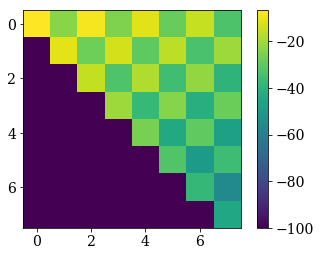

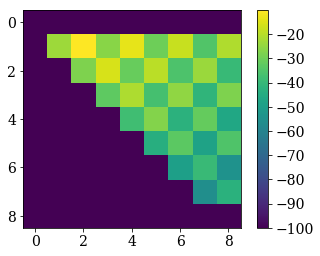

1.7068e-01+3.0977e-05j 1.7068e-01+3.0983e-05j -1.7068e-01-3.4921e-05j || 1.00000e+00
9.9850e-01+1.8099e-02j 9.9850e-01+1.8099e-02j -9.9850e-01-1.8099e-02j || 1.00000e+00
9.9914e-01+2.4893e-02j 9.9914e-01+2.4893e-02j -9.9914e-01-2.4893e-02j || 1.00000e+00
9.9927e-01+2.9583e-02j 9.9927e-01+2.9583e-02j -9.9927e-01-2.9583e-02j || 1.00000e+00
9.9928e-01+3.3078e-02j 9.9928e-01+3.3078e-02j -9.9928e-01-3.3078e-02j || 1.00000e+00
9.9927e-01+3.5730e-02j 9.9927e-01+3.5730e-02j -9.9927e-01-3.5730e-02j || 1.00000e+00
9.9924e-01+3.7717e-02j 9.9924e-01+3.7717e-02j -9.9924e-01-3.7717e-02j || 1.00000e+00
9.9921e-01+3.9141e-02j 9.9921e-01+3.9141e-02j -9.9921e-01-3.9141e-02j || 1.00000e+00
9.9919e-01+4.0062e-02j 9.9919e-01+4.0062e-02j -9.9919e-01-4.0062e-02j || 1.00000e+00
9.9918e-01+4.0515e-02j 9.9918e-01+4.0515e-02j -9.9918e-01-4.0515e-02j || 1.00000e+00
9.9918e-01+4.0515e-02j 9.9918e-01+4.0515e-02j -9.9918e-01-4.0515e-02j || 1.00000e+00
9.9919e-01+4.0062e-02j 9.9919e-01+4.0062e-02j -9.9919e-01-4.0062e

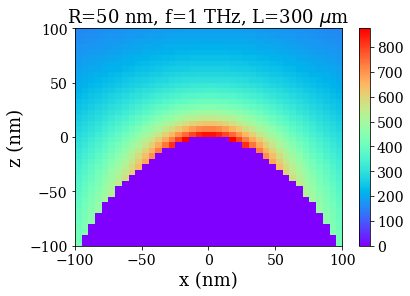

In [30]:
%matplotlib inline
from scipy.special import pro_rad1, pro_rad2, pro_ang1
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 14}
matplotlib.rc('font', **font)

def Map2DIndexTo1D(m_0, m_1, ind_start = 0):
    ## m = m_0 .. m_1-1   n = m ... m_1-1
    map2DTo1D, map1DTo2D = {}, {}
    ind = ind_start
    for m in range(m_0, m_1):
        for n in range(m, m_1):
            map2DTo1D[(m,n)] = ind
            map1DTo2D[ind] = (m, n)
            ind += 1
    return map2DTo1D, map1DTo2D
            
def GetRadialFunc(i, m, n, c, x):
    if i == 1:
        return pro_rad1(m, n, c, x)[0]
    elif i == 2:
        return pro_rad2(m, n, c, x)[0]
    elif i == 3:
        return pro_rad1(m, n, c, x)[0] + 1j*pro_rad2(m, n, c, x)[0]
    elif i == 4:
        return pro_rad1(m, n, c, x)[0] - 1j*pro_rad2(m, n, c, x)[0]
    else:
        assert False

def GetDerivativeRadialFunc(i, m, n, c, x):
    if i == 1:
        return pro_rad1(m, n, c, x)[1]
    elif i == 2:
        return pro_rad2(m, n, c, x)[1]
    elif i == 3:
        return pro_rad1(m, n, c, x)[1] + 1j*pro_rad2(m, n, c, x)[1]
    elif i == 4:
        return pro_rad1(m, n, c, x)[1] - 1j*pro_rad2(m, n, c, x)[1]
    else:
        assert False

def GetIncExpansionCoeffs_Amn(E0, k, theta_0, m, n, c):
    eps_m = 2.0
    if m==0:
        eps_m = 1.0
    N_mn = GetInt_Sm_mpn_Sm_mpN(c, m, n-m, n-m)
    A_mn = 2.0* eps_m * pro_ang1(m, n, c, np.cos(theta_0))[0] / N_mn
    
    j_nm1 = 1j**((n-1)%4)
    
    return E0/k * j_nm1 * A_mn

def ConstructMatrix(E0, k, theta_0, ksi_0, c_0, N_t):
    alphaInd_2DTo1D, alphaInd_1DTo2D = Map2DIndexTo1D(0, N_t)
    n_total = len(alphaInd_2DTo1D)
    betaInd_2DTo1D, betaInd_1DTo2D = Map2DIndexTo1D(1, N_t+1, n_total)
    n_total += len(betaInd_2DTo1D)
    gammaInd = [n_total + i for i in range(N_t - 1)]
    n_total += len(gammaInd)
    

    ##construct coefficient marix
    A = np.zeros((n_total, n_total), dtype=complex)
    b = np.zeros(n_total, dtype=complex)
    
    ## eta: cos(m*phi) m=1..Nt
    for m in range(0, N_t):
        for N in range(m, N_t):
            ind_row = alphaInd_2DTo1D[(m, N)]
            for n in range(m, N_t):
                ind_col = alphaInd_2DTo1D[(m, n)]
                elem = ((ksi_0**2 - 1)*GetDerivativeRadialFunc(4, m, n, c_0, ksi_0) \
                        - ksi_0*m*GetRadialFunc(4, m, n, c_0, ksi_0)) \
                        * GetInt_Sm_mpn_Sm_mpN(c_0, m, n-m, N-m)
                
                A[ind_row, ind_col] += elem

                ind_col = betaInd_2DTo1D[(m+1, n+1)]
                elem = -2.0*np.sqrt(ksi_0**2 - 1)*(m+1)*GetRadialFunc(4, m+1, n+1, c_0, ksi_0) \
                        * GetInt_Smp1_mpnp1_Sm_mpN_x_div_sqrt_1mx2(c_0, m, n-m, N-m)
                
                A[ind_row, ind_col] += elem
            
                ##---- rhs
                A_mn = GetIncExpansionCoeffs_Amn(E0, k, theta_0, m, n, c_0)
                b[ind_row] -= A_mn * \
                              ( \
                                  -ksi_0*m*GetRadialFunc(1, m, n, c_0, ksi_0) \
                                  + (ksi_0**2 - 1)*GetDerivativeRadialFunc(1, m, n, c_0, ksi_0) \
                              ) * GetInt_Sm_mpn_Sm_mpN(c_0, m, n-m, N-m)
                A_mp2np2 = GetIncExpansionCoeffs_Amn(E0, k, theta_0, m+2, n+2, c_0)
                b[ind_row] -= A_mp2np2 * \
                              ( \
                                  ksi_0*(m+2)*GetRadialFunc(1, m+2, n+2, c_0, ksi_0) \
                                  + (ksi_0**2 - 1)*GetDerivativeRadialFunc(1, m+2, n+2, c_0, ksi_0) \
                              ) * GetInt_Smp2_mpnp2_Sm_mpN(c_0, m, n-m, N-m)
                if m==0:
                    A_0n = GetIncExpansionCoeffs_Amn(E0, k, theta_0, 0, n, c_0)
                    b[ind_row] -= A_0n * (ksi_0**2 - 1)*GetDerivativeRadialFunc(1, m, n, c_0, ksi_0) \
                                       * GetInt_Sm_mpn_Sm_mpN(c_0, m, n-m, N-m)
                
            
    ## eta: cos(0*phi)
    for N in range(N_t - 1):
        ind_row = gammaInd[N]
        for n in range(N_t - 1):
            ind_col = gammaInd[n]
            
            elem = (-(ksi_0**2 - 1)*GetDerivativeRadialFunc(4, 1, n+1, c_0, ksi_0) \
                    - ksi_0*1*GetRadialFunc(4, 1, n+1, c_0, ksi_0)) \
                    * GetInt_Sm_mpn_Sm_mpN(c_0, 1, n, N)

            A[ind_row, ind_col] += elem
            
            ## rhs
            A_1np1 = GetIncExpansionCoeffs_Amn(E0, k, theta_0, 1, n+1, c_0)
            b[ind_row] -= A_1np1 * \
                              ( \
                                  ksi_0*GetRadialFunc(1, 1, n+1, c_0, ksi_0) \
                                  + (ksi_0**2 - 1)*GetDerivativeRadialFunc(1, 1, n+1, c_0, ksi_0) \
                              ) * GetInt_Sm_mpn_Sm_mpN(c_0, 1, n, N)
                    
            
    ## phi: sin(m*phi), m=1...Nt-2
    for m in range(0, N_t):
        for N in range(m, N_t):
            ind_row = betaInd_2DTo1D[(m+1, N+1)]
            for n in range(m, N_t):
                ind_col = alphaInd_2DTo1D[(m, n)]
                elem = (ksi_0**2 - 1)*GetDerivativeRadialFunc(4, m, n, c_0, ksi_0) \
                        * GetInt_Sm_mpn_Sm_mpN_x(c_0, m, n-m, N-m) \
                    +  \
                        ksi_0 * GetRadialFunc(4, m, n, c_0, ksi_0) \
                        * GetInt_dxSm_mpn_Sm_mpN_1mx2(c_0, m, n-m, N-m) 
                
                A[ind_row, ind_col] += elem

                ind_col = betaInd_2DTo1D[(m+1, n+1)]
                elem = 2.0*np.sqrt(ksi_0**2 - 1) * \
                        ( \
                            GetRadialFunc(4, m+1, n+1, c_0, ksi_0) \
                            * GetInt_dxSmp1_mpnp1_Sm_mpN_x_sqrt_1mx2(c_0, m, n-m, N-m) \
                        - \
                            ksi_0 * GetDerivativeRadialFunc(4, m+1, n+1, c_0, ksi_0) \
                            * GetInt_Smp1_mpnp1_Sm_mpN_sqrt_1mx2(c_0, m, n-m, N-m) \
                        )

                ##---- rhs
                A_mn = GetIncExpansionCoeffs_Amn(E0, k, theta_0, m, n, c_0)
                b[ind_row] -= A_mn * \
                    ( \
                       ksi_0*GetRadialFunc(1, m, n, c_0, ksi_0)*GetInt_dxSm_mpn_Sm_mpN_1mx2(c_0, m, n-m, N-m) \
                       + (ksi_0**2 - 1)*GetDerivativeRadialFunc(1, m, n, c_0, ksi_0) \
                                       *GetInt_Sm_mpn_Sm_mpN_x(c_0, m, n-m, N-m) \
                    )
                A_mp2np2 = GetIncExpansionCoeffs_Amn(E0, k, theta_0, m+2, n+2, c_0)
                b[ind_row] += A_mp2np2 * \
                    ( \
                       ksi_0*GetRadialFunc(1, m+2, n+2, c_0, ksi_0)*GetInt_dxSmp2_mpnp2_Sm_mpN_1mx2(c_0, m, n-m, N-m) \
                       + (ksi_0**2 - 1)*GetDerivativeRadialFunc(1, m+2, n+2, c_0, ksi_0) \
                                       *GetInt_Smp2_mpnp2_Sm_mpN_x(c_0, m, n-m, N-m) \
                    )
                if m==0:
                    A_0n = GetIncExpansionCoeffs_Amn(E0, k, theta_0, 0, n, c_0)
                    b[ind_row] -= A_0n * \
                    ( \
                       ksi_0*GetRadialFunc(1, m, n, c_0, ksi_0)*GetInt_dxSm_mpn_Sm_mpN_1mx2(c_0, m, n-m, N-m) \
                       + (ksi_0**2 - 1)*GetDerivativeRadialFunc(1, m, n, c_0, ksi_0) \
                                       *GetInt_Sm_mpn_Sm_mpN_x(c_0, m, n-m, N-m) \
                    )                    

                A[ind_row, ind_col] += elem
    return A, b

def GetAlphaBetaGamma_from_X(x, N_t):
    alphaInd_2DTo1D, alphaInd_1DTo2D = Map2DIndexTo1D(0, N_t)
    n_total = len(alphaInd_2DTo1D)
    n_end_alpha = n_total
    
    betaInd_2DTo1D, betaInd_1DTo2D = Map2DIndexTo1D(1, N_t+1, n_total)
    n_total += len(betaInd_2DTo1D)
    n_end_beta = n_total

    gammaInd = [n_total + i for i in range(N_t - 1)]
    n_total += len(gammaInd)
        
    alpha = np.zeros((N_t, N_t), dtype=complex)
    beta = np.zeros((N_t+1, N_t+1), dtype=complex)
    gamma = np.zeros(N_t, dtype=complex)
    
    for i in range(n_end_alpha):
        alpha[alphaInd_1DTo2D[i]] = x[i]
    print(betaInd_1DTo2D)
    for i in range(n_end_alpha, n_end_beta):
        beta[betaInd_1DTo2D[i]] = x[i]
    for i in range(n_end_beta, len(x)):
        gamma[i - n_end_beta + 1] = x[i]
        
    return alpha, beta, gamma
    
def Get_ProlateSpheroidParameters(tipRadius, length):
    b2_div_a = tipRadius
    a = length/2.0
    b = np.sqrt(b2_div_a * a)
    
    # d*ksi = a     d*sqrt(ksi**2 - 1) = b
    # ksi**2 * (1 - (b/a)**2) = 1
    ksi = 1.0/(1.0 - (b/a)**2)
    d = a / ksi
    
    return a, b, ksi, d
    
def Get_c0(freq, d):
    lambda_0 = constants.c / freq
    k = 2.0*np.pi/lambda_0
    c0 = k*d/2
    return c0

def GetETMonSurface_direct(E_0, k, etas, ksi_0, phi_0, d):
    import numpy as np
    assert phi_0 == 0
    n = len(etas)
    E_eta = np.zeros(n, dtype=complex)
    E_ksi = np.zeros(n, dtype=complex)
    for i in range(n):
        eta = etas[i]
        z_hat_eta = ksi_0*np.sqrt((1 - eta**2)/(ksi_0**2 - eta**2))
        z_hat_ksi = eta * np.sqrt((ksi_0**2 - 1)/(ksi_0**2 - eta**2))
        x = d/2*np.sqrt(1 - eta**2)*np.sqrt(ksi_0**2 - 1)*np.cos(phi_0)
        E_eta[i] = E_0*np.exp(1j*k*x)*z_hat_eta
        E_ksi[i] = E_0*np.exp(1j*k*x)*z_hat_ksi
    return E_eta, E_ksi

def GetETMonSurface_expansion(E_0, k, etas, ksi_0, phi_0, d, c_0):
    assert phi_0 == 0
    theta_0 = np.pi/2
    n_eta = len(etas)
    E_eta = np.zeros(n_eta, dtype=complex)
    E_ksi = np.zeros(n_eta, dtype=complex)
    N = 10
    for i in range(n_eta):
        eta = etas[i]
        for m in range(N):
            for n in range(m, N):
                A_mn = GetIncExpansionCoeffs_Amn(E_0, k, theta_0, m, n, c_0)
                E_eta[i] += A_mn * 2*(ksi_0**2 - 1)*GetDerivativeRadialFunc(1, m, n, c_0, ksi_0) \
                                     *pro_ang1(m, n, c_0, eta)[0] \
                                    /(d*np.sqrt(ksi_0**2 - eta**2)*np.sqrt(ksi_0**2 - 1))
                E_ksi[i] += A_mn * (-2)*(1 - eta**2)*pro_ang1(m, n, c_0, eta)[1] \
                                    *GetRadialFunc(1, m, n, c_0, ksi_0) \
                                    /(d*np.sqrt(ksi_0**2 - eta**2)*np.sqrt(1 - eta**2))
    return E_eta, E_ksi

def GetM_mplus1n_o_plus_eta(eta, ksi, phi, m, n, c, d):
    return  (ksi**2*GetDerivativeRadialFunc(4, m, n, c, ksi) - ksi*m*GetRadialFunc(4, m, n, c, ksi) - GetDerivativeRadialFunc(4, m, n, c, ksi))*pro_ang1(m, n, c, eta)[0]*np.cos(phi*(m + 1))/(d*np.sqrt(-eta**2 + ksi**2)*np.sqrt(ksi**2 - 1))
def GetM_mplus1n_o_plus_ksi(eta, ksi, phi, m, n, c, d):
    return (eta**2*pro_ang1(m, n, c, eta)[1] - eta*m*pro_ang1(m, n, c, eta)[0] - pro_ang1(m, n, c, eta)[1])*GetRadialFunc(4, m, n, c, ksi)*np.cos(phi*(m + 1))/(d*np.sqrt(-eta**2 + 1)*np.sqrt(-eta**2 + ksi**2))
def GetM_mplus1n_o_plus_phi(eta, ksi, phi, m, n, c, d):
    return -(eta*(ksi**2 - 1)*pro_ang1(m, n, c, eta)[0]*GetDerivativeRadialFunc(4, m, n, c, ksi) - ksi*(eta**2 - 1)*GetRadialFunc(4, m, n, c, ksi)*pro_ang1(m, n, c, eta)[1])*np.sin(phi*m + phi)/(d*(eta**2 - ksi**2))

def GetM_mminus1n_o_minus_eta(eta, ksi, phi, m, n, c, d):
    return  (-ksi**2*GetDerivativeRadialFunc(4, m, n, c, ksi) - ksi*m*GetRadialFunc(4, m, n, c, ksi) + GetDerivativeRadialFunc(4, m, n, c, ksi))*pro_ang1(m, n, c, eta)[0]*np.cos(phi*(m - 1))/(d*np.sqrt(-eta**2 + ksi**2)*np.sqrt(ksi**2 - 1))
def GetM_mminus1n_o_minus_ksi(eta, ksi, phi, m, n, c, d):
    return  (-eta**2*pro_ang1(m, n, c, eta)[1] - eta*m*pro_ang1(m, n, c, eta)[0] + pro_ang1(m, n, c, eta)[1])*GetRadialFunc(4, m, n, c, ksi)*np.cos(phi*(m - 1))/(d*np.sqrt(-eta**2 + 1)*np.sqrt(-eta**2 + ksi**2))
def GetM_mminus1n_o_minus_phi(eta, ksi, phi, m, n, c, d):
    return  -(eta*(ksi**2 - 1)*pro_ang1(m, n, c, eta)[0]*GetDerivativeRadialFunc(4, m, n, c, ksi) - ksi*(eta**2 - 1)*GetRadialFunc(4, m, n, c, ksi)*pro_ang1(m, n, c, eta)[1])*np.sin(phi*(m - 1))/(d*(eta**2 - ksi**2))

def GetM_mn_o_z_eta(eta, ksi, phi, m, n, c, d):
    return  -2*eta*m*GetRadialFunc(4, m, n, c, ksi)*pro_ang1(m, n, c, eta)[0]*np.cos(phi*m)/(d*np.sqrt(-eta**2 + 1)*np.sqrt(-eta**2 + ksi**2))
def GetM_mn_o_z_ksi(eta, ksi, phi, m, n, c, d):
    return  2*ksi*m*GetRadialFunc(4, m, n, c, ksi)*pro_ang1(m, n, c, eta)[0]*np.cos(phi*m)/(d*np.sqrt(-eta**2 + ksi**2)*np.sqrt(ksi**2 - 1))
def GetM_mn_o_z_phi(eta, ksi, phi, m, n, c, d):
    return  2*np.sqrt(-eta**2 + 1)*np.sqrt(ksi**2 - 1)*(-eta*GetRadialFunc(4, m, n, c, ksi)*pro_ang1(m, n, c, eta)[1] + ksi*pro_ang1(m, n, c, eta)[0]*GetDerivativeRadialFunc(4, m, n, c, ksi))*np.sin(phi*m)/(d*(eta**2 - ksi**2))

def GetFieldOnSurface(alpha, beta, gamma, etas, ksi_0, phi_0, c, d):
    ksi = ksi_0
    phi = phi_0
    n_eta = len(etas)
    E_eta = np.zeros(n_eta, dtype=complex)
    E_ksi = np.zeros(n_eta, dtype=complex)
    for i in range(n_eta):
        eta = etas[i]
        M, N = alpha.shape
        for m in range(M):
            for n in range(m, N):
                E_eta[i] += alpha[m, n]*GetM_mplus1n_o_plus_eta(eta, ksi, phi, m, n, c, d)
                E_ksi[i] += alpha[m, n]*GetM_mplus1n_o_plus_ksi(eta, ksi, phi, m, n, c, d)

        M, N = beta.shape
        for m in range(M):
            for n in range(m, N):
                E_eta[i] += beta[m, n]*GetM_mn_o_z_eta(eta, ksi, phi, m, n, c, d)
                E_ksi[i] += beta[m, n]*GetM_mn_o_z_ksi(eta, ksi, phi, m, n, c, d)

        N = len(gamma)
        for n in range(1,N):
            E_eta[i] += gamma[n]*GetM_mminus1n_o_minus_eta(eta, ksi, phi, 1, n, c, d)
            E_ksi[i] += gamma[n]*GetM_mminus1n_o_minus_ksi(eta, ksi, phi, 1, n, c, d)
              
    return E_eta, E_ksi

def GetFieldAtCartesianPoints(alpha, beta, gamma, r_pts, c, d, E0, k, totalField=True):
    ## r = [x, y, z]
    n_pts = len(r_pts)
    E_eta = np.zeros(n_pts, dtype=complex)
    E_ksi = np.zeros(n_pts, dtype=complex)
    E_phi = np.zeros(n_pts, dtype=complex)
    for i in range(n_pts):
        x, y, z = r_pts[i]
        eta, ksi, phi = CoordinatePointTransformRectToSpheroid(x, y, z, d)
        M, N = alpha.shape
        for m in range(M):
            for n in range(m, N):
                E_eta[i] += alpha[m, n]*GetM_mplus1n_o_plus_eta(eta, ksi, phi, m, n, c, d)
                E_ksi[i] += alpha[m, n]*GetM_mplus1n_o_plus_ksi(eta, ksi, phi, m, n, c, d)
                E_phi[i] += alpha[m, n]*GetM_mplus1n_o_plus_phi(eta, ksi, phi, m, n, c, d)

        M, N = beta.shape
        for m in range(M):
            for n in range(m, N):
                E_eta[i] += beta[m, n]*GetM_mn_o_z_eta(eta, ksi, phi, m, n, c, d)
                E_ksi[i] += beta[m, n]*GetM_mn_o_z_ksi(eta, ksi, phi, m, n, c, d)
                E_phi[i] += beta[m, n]*GetM_mn_o_z_phi(eta, ksi, phi, m, n, c, d)

        N = len(gamma)
        for n in range(1,N):
            E_eta[i] += gamma[n]*GetM_mminus1n_o_minus_eta(eta, ksi, phi, 1, n, c, d)
            E_ksi[i] += gamma[n]*GetM_mminus1n_o_minus_ksi(eta, ksi, phi, 1, n, c, d)
            E_phi[i] += gamma[n]*GetM_mminus1n_o_minus_phi(eta, ksi, phi, 1, n, c, d)

        if totalField:
            z_hat_eta = ksi*np.sqrt((1 - eta**2)/(ksi**2 - eta**2))
            z_hat_ksi = eta * np.sqrt((ksi**2 - 1)/(ksi**2 - eta**2))
            #x = d/2*np.sqrt(1 - eta**2)*np.sqrt(ksi**2 - 1)*np.cos(phi)
            E_eta[i] += E_0*np.exp(1j*k*x)*z_hat_eta
            E_ksi[i] += E_0*np.exp(1j*k*x)*z_hat_ksi
            
    return E_eta, E_ksi, E_phi
                
def CoordinatePointTransformSpheroidToRect(eta, ksi, phi, d):
    x = d/2*sqrt((1 - eta**2))*sqrt((ksi**2 - 1))*cos(phi)
    y = d/2*sqrt((1 - eta**2))*sqrt((ksi**2 - 1))*sin(phi)
    z = d/2*eta*ksi
    return x, y, z

def CoordinatePointTransformRectToSpheroid(x, y, z, d):
    ksi = (np.sqrt(x**2 + y**2 + (z + d/2)**2) + np.sqrt(x**2 + y**2 + (z - d/2)**2))/d
    eta = (np.sqrt(x**2 + y**2 + (z + d/2)**2) - np.sqrt(x**2 + y**2 + (z - d/2)**2))/d
    phi = np.arctan2(y, x)
    return eta, ksi, phi
    
def PlotFieldAroundTipAtXZPlane(Dx, Dz, nx, nz, ksi_0, alpha, beta, gamma, a, c, d, E0, k, totalField=True):
    x = np.linspace(-Dx/2, Dx/2, nx)
    z = np.linspace(a/2-Dz/2, a/2+Dz/2, nz)
    X, Z = np.meshgrid(x, z, indexing="ij")
    
    r_pts = []
    r_inds = []
    for i in range(nx):
        x_i = x[i]
        for j in range(nz):
            z_j = z[j]
            eta, ksi, phi = CoordinatePointTransformRectToSpheroid(x_i, 0.0, z_j, d)
            if ksi > ksi_0:
                r_pts.append([x_i, 0.0, z_j])
                r_inds.append((i, j))
    E_eta, E_ksi, E_phi = GetFieldAtCartesianPoints(alpha, beta, gamma, r_pts, c, d, E0, k, totalField)
    
    E_ksi_mesh = np.zeros(X.shape, dtype=complex)
    for i in range(len(r_inds)):
        E_ksi_mesh[r_inds[i]] = E_ksi[i]
        
    E_ksi_mesh *= np.isfinite(E_ksi_mesh)
    
    #plt.imshow(np.log10(np.abs(E_ksi_mesh.T) + 1.0e-100), origin="lower", vmin=-10)
    plt.imshow(np.abs(E_ksi_mesh.T), origin="lower", cmap="rainbow", aspect="auto", 
               extent=np.array([-Dx/2, Dx/2, -Dz/2, Dz/2])/constants.nano)
    plt.colorbar()
    plt.xlabel(r'x (nm)', fontsize=18)
    plt.ylabel(r'z (nm)', fontsize=18)
    plt.title(r'R=50 nm, f=1 THz, L=300 $\mu$m', fontsize=18)
    plt.savefig("other/tip_field.png", bbox_inches='tight', pad_inches=0.5)
    plt.show()

tipRadius = 50.0*constants.nano
length = 300.0*constants.micro
freq = 1.0*constants.tera
k = 2.0*np.pi*freq/constants.c
E_0 = 1

ellipse_a, ellipse_b, ellipse_ksi, ellipse_d = Get_ProlateSpheroidParameters(tipRadius, length)
print("a = {},  b = {},  ksi = {},  d = {} ".format(ellipse_a, ellipse_b, ellipse_ksi, ellipse_d))
c_0 = Get_c0(freq, ellipse_d)
print("c_0 = {} ".format(c_0))

N_max = 8
A, b = ConstructMatrix(E0=E_0, k=k, theta_0=np.pi/2, ksi_0=ellipse_ksi, c_0=c_0, N_t=N_max)
cond = np.linalg.cond(A)
print("condition: ", cond)

x = np.linalg.solve(A, b)
print("error: ", np.linalg.norm(A.dot(x) - b))

alpha, beta, gamma = GetAlphaBetaGamma_from_X(x, N_max)
#np.set_printoptions(precision=1)
#print("alpha: \n", np.abs(alpha))
#print("beta: \n", np.abs(beta))
#print("gamma: \n", np.abs(gamma))

plt.imshow(np.log10(np.abs(alpha) + 1.0e-100))
plt.colorbar()
plt.show()
plt.imshow(np.log10(np.abs(beta) + 1.0e-100))
plt.colorbar()
plt.show()

np.set_printoptions(precision=5)

eps = 1.0e-5
etas = np.linspace(-1.0+eps, 1.0-eps, 20)
phi_0 = 0.0
ksi_0 = ellipse_ksi
d = ellipse_d
E_eta0, E_ksi0 = GetETMonSurface_direct(E_0, k, etas, ksi_0, phi_0, d)
E_eta1, E_ksi1 = GetETMonSurface_expansion(E_0, k, etas, ksi_0, phi_0, d, c_0)
E_eta2, E_ksi2 = GetFieldOnSurface(alpha, beta, gamma, etas, ksi_0, phi_0, c_0, d)

print('='*50)
for i in range(len(E_eta0)):
    print("{:.4e} {:.4e} {:.4e} || {:.5e}".format(E_eta0[i], E_eta1[i], E_eta2[i], abs(E_eta2[i]/E_eta0[i])))
print('-'*50)
for i in range(len(E_eta0)):
    print("{:.3e} {:.3e} {:.3e} || {:.3f}".format(E_ksi0[i], E_ksi1[i], E_ksi2[i], abs(E_ksi2[i])))

PlotFieldAroundTipAtXZPlane(Dx=4.0*tipRadius, Dz=4.0*tipRadius, nx=40, nz=40, 
                            ksi_0=ksi_0, alpha=alpha, beta=beta, gamma=gamma, 
                            a=ellipse_a, c=c_0, d=ellipse_d, E0=E_0, k=k, totalField=True)

### Integrals

In [2]:
from scipy.integrate import quadrature, quad
import numpy as np
from scipy.special import pro_ang1
from Electromagnetics import specfun

def Get_Int_PmnPmn(m, n):
    if m > n:
        return 0
    fact_mpn_div_fact_mmn = 1.0
    for i in range(n + m, max(n - m, 0), -1):
        fact_mpn_div_fact_mmn *= i
    return 2.0/(2*n + 1)*fact_mpn_div_fact_mmn

def Get_Int_Pm2muPmnu(m, mu, nu):
    if m + 2 > mu or m > nu:
        return 0
    if mu < nu:
        return 0.0
    elif mu == nu:
        fact_div = 1.0
        for i in range(nu + m, max(nu - m - 2, 0), -1):
            fact_div *= i        
        return -2.0/(2.0*nu + 1)*fact_div
    elif (mu + nu) % 2 == 0:
        fact_div = 1.0
        for i in range(nu + m, max(nu - m, 0), -1):
            fact_div *= i                
        return 4*(m + 1)*fact_div
    else:
        return 0.0
    
def Get_Int_PmnPmn_div_1mx2(m, n):
    if m > n:
        return 0
    if m!=0:
        fact_div = 1.0
        for i in range(n + m, max(n - m, 0), -1):
            fact_div *= i                
        return fact_div / m
    else:
        return np.inf
        

def Expand_P_minusm_n(m, n):
    coeff = 0.0
    if abs(m) <= n:
        fact_mpn_div_fact_mmn = 1.0
        for i in range(n + m, max(n - m, 0), -1):
            fact_mpn_div_fact_mmn *= i        
        coeff = 1.0 / fact_mpn_div_fact_mmn
        if m % 2 == 1:
            coeff *= -1.0
    return {(m, n):coeff}

def Expand_xPmn(m, n):
    return {(m, n-1):(n + m)/(2*n + 1), (m, n+1):(n - m + 1)/(2*n + 1)}

def Expand_x_div_sqrt_1mx2_Pmn(m, n):
    return {(m-1, n):-(n + m)*(n - m + 1)/(2*m), (m+1, n):-1/(2*m)}
    
def Expand_1_div_sqrt_1mx2_Pmn__nm1(m, n):
    return {(m-1, n-1):-(n + m)*(n + m - 1)/(2*m), (m+1, n-1):-1/(2*m)}

def Expand_1_div_sqrt_1mx2_Pmn__np1(m, n):
    return {(m-1, n+1):-(n - m + 1)*(n - m + 2)/(2*m), (m+1, n+1):-1/(2*m)}

def Expand_1mx2_dxPmn(m, n):
    return {(m, n-1):(n + 1)*(n + m)/(2*n + 1), (m, n+1):-n*(n - m + 1)/(2*n + 1)}

def Expand_sqrt_1mx2_Pmn__mm1(m, n):
    return {(m-1, n-1):-(n + m)*(n + m - 1)/(2*n + 1), (m-1, n+1):(n - m + 1)*(n - m + 2)/(2*n + 1)}

def Expand_sqrt_1mx2_Pmn__mp1(m, n):
    return {(m+1, n-1):1/(2*n + 1), (m+1, n+1):-1/(2*n + 1)}

def Expand_sqrt_1mx2_dxPmn(m, n):
    return {(m-1, n):(n + m)*(n - m + 1)/2, (m+1, n):-1.0/2}


from Electromagnetics import specfun

def Get_Expansion_Coeff_d_mn(m, n, c, thresh_rel=1.0e-14):
    cv = specfun.segv(m, n, c, 1)[0]
    d_mn = specfun.sdmn(m, n, c, cv, 1)

    if m % 2 == 1:
        d_mn *= -1.0
        
    d_inds = None
    if (n - m) % 2 == 0:
        d_inds = np.array([2*i for i in range(len(d_mn))])
    else:
        d_inds = np.array([2*i+1 for i in range(len(d_mn))])
        
    if thresh_rel != 0.0:
        d_mn_max = np.max(np.abs(d_mn))
        filt = np.abs(d_mn) > d_mn_max*thresh_rel
        d_mn = d_mn[filt]
        d_inds = d_inds[filt]
    else:
        ind_max = np.argmax(d_mn==0.0)
        if ind_max > 0:
            d_mn = d_mn[:ind_max]
            d_inds = d_inds[:ind_max]
        
    return d_mn.copy(), d_inds.copy()

## I_1mNn
def GetInt_Sm_mpn_Sm_mpN(c, m, n, N):
    if n == N:
        d_mn, d_inds = Get_Expansion_Coeff_d_mn(m, m+n, c)
        I = 0.0
        for i in range(len(d_mn)):
            I += d_mn[i]**2 * Get_Int_PmnPmn(m, m+d_inds[i])
        return I
    else:
        return 0.0

def GetInt_Sm_mpn_Sm_mpN_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m, m+n, c, x)[0]*pro_ang1(m, m+N, c, x)[0]
    return quad(f, -1, 1)

def GetInt_Sm_mpn_Sm_mpN_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m, m+n, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m, m+n, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]
    return quad(f, -1, 1)

## I_2mNn
def GetInt_Smp1_mpnp1_Sm_mpN_x_div_sqrt_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+1, m+n+1, c)
    m_q = m + 1
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_x_div_sqrt_1mx2_Pmn(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    if n_q_expan == m_r + d_r_inds[r]:
                        I += coeff*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            elif m_q_expan == m_r + 2:
                for r in range(len(d_r)):
                    I += coeff*d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r, n_q_expan, m_r + d_r_inds[r])
            else:
                assert False
    return I

def GetInt_Smp1_mpnp1_Sm_mpN_x_div_sqrt_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+1, m+n+1, c, x)[0]*pro_ang1(m, m+N, c, x)[0]*x/np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_Smp1_mpnp1_Sm_mpN_x_div_sqrt_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+1, m+n+1, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+1, m+n+1, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*x/np.sqrt(1 - x**2)
    return quad(f, -1, 1)

## I_3mNn
def GetInt_Sm_mpn_Sm_mpN_x(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m, m+n, c)
    m_q = m
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_xPmn(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    if n_q_expan == m_r + d_r_inds[r]:
                        I += coeff*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            else:
                assert False
    return I

def GetInt_Sm_mpn_Sm_mpN_x_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m, m+n, c, x)[0]*pro_ang1(m, m+N, c, x)[0]*x
    return quad(f, -1, 1)

def GetInt_Sm_mpn_Sm_mpN_x_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m, m+n, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m, m+n, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*x
    return quad(f, -1, 1)

## I_4mNn
def GetInt_dxSm_mpn_Sm_mpN_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m, m+n, c)
    m_q = m
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_1mx2_dxPmn(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    if n_q_expan == m_r + d_r_inds[r]:
                        I += coeff*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            else:
                assert False
    return I

def GetInt_dxSm_mpn_Sm_mpN_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m, m+n, c, x)[1]*pro_ang1(m, m+N, c, x)[0]*(1 - x**2)
    return quad(f, -1, 1)

def GetInt_dxSm_mpn_Sm_mpN_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m, m+n, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m, m+n, c, x, 1, cv_n)[1]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*(1 - x**2)
    return quad(f, -1, 1)

## I_5mNn
def GetInt_Smp1_mpnp1_Sm_mpN_sqrt_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+1, m+n+1, c)
    m_q = m + 1
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_sqrt_1mx2_Pmn__mm1(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    if n_q_expan == m_r + d_r_inds[r]:
                        I += coeff*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            else:
                assert False
    return I

def GetInt_Smp1_mpnp1_Sm_mpN_sqrt_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+1, m+n+1, c, x)[0]*pro_ang1(m, m+N, c, x)[0]*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_Smp1_mpnp1_Sm_mpN_sqrt_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+1, m+n+1, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+1, m+n+1, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

## I_6mNn
def GetInt_dxSmp1_mpnp1_Sm_mpN_x_sqrt_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+1, m+n+1, c)
    m_q = m + 1
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_sqrt_1mx2_dxPmn(m_q, m_q + d_q_inds[q])
        for mn_q_pair in q_expansion:
            m_q_expan, n_q_expan = mn_q_pair
            coeff_q = q_expansion[mn_q_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    r_expansion = Expand_xPmn(m_r, m_r + d_r_inds[r])
                    for mn_r_pair in r_expansion:
                        m_r_expan, n_r_expan = mn_r_pair
                        coeff_r = r_expansion[mn_r_pair]
                        assert m_r_expan == m_q_expan
                        if n_q_expan == n_r_expan:
                            I += coeff_q*coeff_r*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            elif m_q_expan == m_r + 2:
                for r in range(len(d_r)):
                    r_expansion = Expand_xPmn(m_r, m_r + d_r_inds[r])
                    for mn_r_pair in r_expansion:
                        m_r_expan, n_r_expan = mn_r_pair
                        coeff_r = r_expansion[mn_r_pair]
                        assert m_r_expan + 2 == m_q_expan
                        I += coeff_q*coeff_r*d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r_expan, n_q_expan, n_r_expan)
            else:
                assert False
    return I

def GetInt_dxSmp1_mpnp1_Sm_mpN_x_sqrt_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+1, m+n+1, c, x)[1]*pro_ang1(m, m+N, c, x)[0]*x*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_dxSmp1_mpnp1_Sm_mpN_x_sqrt_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+1, m+n+1, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+1, m+n+1, c, x, 1, cv_n)[1]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*x*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

## I_7mNn
def GetInt_Smp2_mpnp2_Sm_mpN(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+2, m+n+2, c)
    m_q = m + 2
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        for r in range(len(d_r)):
            I += d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r, m_q + d_q_inds[q], m_r + d_r_inds[r])
    return I

def GetInt_Smp2_mpnp2_Sm_mpN_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+2, m+n+2, c, x)[0]*pro_ang1(m, m+N, c, x)[0]
    return quad(f, -1, 1)

def GetInt_Smp2_mpnp2_Sm_mpN_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+2, m+n+2, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+2, m+n+2, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]
    return quad(f, -1, 1)

## I_8mNn
def GetInt_Smp2_mpnp2_Sm_mpN_x(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+2, m+n+2, c)
    m_q = m + 2
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_xPmn(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r + 2:
                for r in range(len(d_r)):
                    I += coeff*d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r, n_q_expan, m_r + d_r_inds[r])
            else:
                assert False
    return I

def GetInt_Smp2_mpnp2_Sm_mpN_x_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+2, m+n+2, c, x)[0]*pro_ang1(m, m+N, c, x)[0]*x
    return quad(f, -1, 1)

def GetInt_Smp2_mpnp2_Sm_mpN_x_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+2, m+n+2, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+2, m+n+2, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*x
    return quad(f, -1, 1)

## I_9mNn
def GetInt_dxSmp2_mpnp2_Sm_mpN_1mx2(c, m, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(m+2, m+n+2, c)
    m_q = m + 2
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(m, m+N, c)
    m_r = m
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_1mx2_dxPmn(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r + 2:
                for r in range(len(d_r)):
                    I += coeff*d_q[q]*d_r[r]*Get_Int_Pm2muPmnu(m_r, n_q_expan, m_r + d_r_inds[r])
            else:
                assert False
    return I

def GetInt_dxSmp2_mpnp2_Sm_mpN_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m+2, m+n+2, c, x)[1]*pro_ang1(m, m+N, c, x)[0]*(1 - x**2)
    return quad(f, -1, 1)

def GetInt_dxSmp2_mpnp2_Sm_mpN_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m+2, m+n+2, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m+2, m+n+2, c, x, 1, cv_n)[1]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*(1 - x**2)
    return quad(f, -1, 1)

## I_10Nn
def GetInt_S0_n_S1_1pN_sqrt_1mx2(c, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(0, n, c)
    m_q = 0
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(1, 1+N, c)
    m_r = 1
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_sqrt_1mx2_Pmn__mp1(m_q, m_q + d_q_inds[q])
        for mn_pair in q_expansion:
            m_q_expan, n_q_expan = mn_pair
            coeff = q_expansion[mn_pair]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    if n_q_expan == m_r + d_r_inds[r]:
                        I += coeff*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            else:
                assert False
    return I

def GetInt_S0_n_S1_1pN_sqrt_1mx2_quad1(c, n, N):
    def f(x):
        return pro_ang1(0, n, c, x)[0]*pro_ang1(1, 1+N, c, x)[0]*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_S0_n_S1_1pN_sqrt_1mx2_quad2(c, n, N):
    def f(x):
        cv_n = specfun.segv(0, n, c, 1)[0]
        cv_N = specfun.segv(1, 1+N, c, 1)[0]
        return specfun.aswfa(0, n, c, x, 1, cv_n)[0]*specfun.aswfa(1, 1+N, c, x, 1, cv_N)[0]*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

## I_11Nn
def GetInt_dxS0_n_S1_1pN_sqrt_x_sqrt_1mx2(c, n, N):
    d_q, d_q_inds = Get_Expansion_Coeff_d_mn(0, n, c)
    m_q = 0
    d_r, d_r_inds = Get_Expansion_Coeff_d_mn(1, 1+N, c)
    m_r = 1
    len_q = len(d_q_inds)
    len_r = len(d_r_inds)
    
    I = 0.0
    for q in range(len(d_q)):
        q_expansion = Expand_sqrt_1mx2_dxPmn(m_q, m_q + d_q_inds[q])
        for mn_q_pair in q_expansion:
            m_q_expan, n_q_expan = mn_q_pair
            coeff_q = q_expansion[mn_q_pair]
            if m_q_expan < 0:
                minusm_expansion = Expand_P_minusm_n(abs(m_q_expan), n_q_expan)
                assert len(minusm_expansion) == 1
                m_q_expan, n_q_expan = list(minusm_expansion.keys())[0]
                coeff_q *= list(minusm_expansion.values())[0]
            if m_q_expan == m_r:
                for r in range(len(d_r)):
                    r_expansion = Expand_xPmn(m_r, m_r + d_r_inds[r])
                    for mn_r_pair in r_expansion:
                        m_r_expan, n_r_expan = mn_r_pair
                        coeff_r = r_expansion[mn_r_pair]
                        assert m_r_expan == m_q_expan
                        if n_q_expan == n_r_expan:
                            I += coeff_q*coeff_r*d_q[q]*d_r[r]*Get_Int_PmnPmn(m_q_expan, n_q_expan)
            else:
                assert False
    return I

def GetInt_dxS0_n_S1_1pN_sqrt_x_sqrt_1mx2_quad1(c, n, N):
    def f(x):
        return pro_ang1(0, n, c, x)[1]*pro_ang1(1, 1+N, c, x)[0]*x*np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_dxS0_n_S1_1pN_sqrt_x_sqrt_1mx2_quad2(c, n, N):
    def f(x):
        cv_n = specfun.segv(0, n, c, 1)[0]
        cv_N = specfun.segv(1, 1+N, c, 1)[0]
        return specfun.aswfa(0, n, c, x, 1, cv_n)[1]*specfun.aswfa(1, 1+N, c, x, 1, cv_N)[0]*x*np.sqrt(1 - x**2)
    return quad(f, -1, 1)


## I_3mNn.....?
def GetInt_Sm_mpn_Sm_mpN_x_div_sqrt_1mx2_quad1(c, m, n, N):
    def f(x):
        return pro_ang1(m, m+n, c, x)[0]*pro_ang1(m, m+N, c, x)[0]*x/np.sqrt(1 - x**2)
    return quad(f, -1, 1)

def GetInt_Sm_mpn_Sm_mpN_x_div_sqrt_1mx2_quad2(c, m, n, N):
    def f(x):
        cv_n = specfun.segv(m, m+n, c, 1)[0]
        cv_N = specfun.segv(m, m+N, c, 1)[0]
        return specfun.aswfa(m, m+n, c, x, 1, cv_n)[0]*specfun.aswfa(m, m+N, c, x, 1, cv_N)[0]*x/np.sqrt(1 - x**2)
    return quad(f, -1, 1)


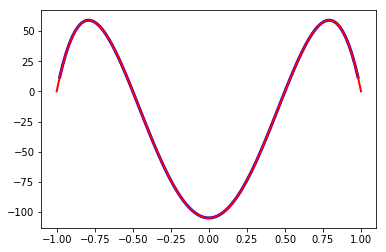

In [8]:
%matplotlib inline
from scipy.special import lpmv
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.linspace(-1, 1, N)
m = 3
n = 4

P_expansion = Expand_sqrt_1mx2_dxPmn(m, n)
y = np.zeros(len(x))
for mn in P_expansion:
    y += P_expansion[mn]*lpmv(mn[0], mn[1], x)

dxPmn = (lpmv(m, n, x + 1.0e-3) - lpmv(m, n, x - 1.0e-3))/2.0e-3
Pmn = lpmv(m, n, x)
    
plt.plot(x, np.sqrt(1 - x**2)*dxPmn, "b", lw=3)
plt.plot(x, y, "r", lw=2)


I0:  (152.72727272727275, 1.6956133467002394e-12)
I1:  152.72727272727272


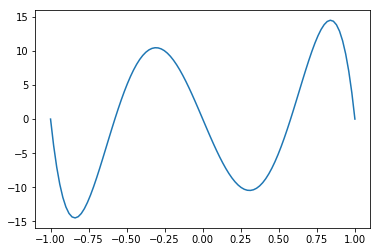

In [48]:
from scipy.integrate import quadrature, quad

m = 2
n = 5

def f(x):
    return lpmv(m, n, x)*lpmv(m, n, x)

I0 = quad(f, -1, 1)
I1 = Get_Int_PmnPmn(m, n)

print("I0: ", I0)
print("I1: ", I1)

x = np.linspace(-1, 1, 100)
plt.plot(x, lpmv(m, n, x))


[ 2.83459410e-02  1.00065279e+00 -2.04714515e-03  2.79125691e-06
 -2.83531597e-09  2.24819629e-12 -1.43421582e-15  7.52903438e-19
 -3.31126746e-22  1.23817198e-25 -3.98548660e-29  1.11607827e-32
 -2.74411318e-36  5.97153690e-40 -1.15829939e-43  2.01530209e-47
 -3.16294946e-51  4.50072407e-55 -5.83321043e-59  6.91488935e-63
 -7.52620238e-67  7.54750352e-71 -6.99633465e-75  6.01275982e-79
 -4.80412551e-83  3.57773598e-87 -2.48940601e-91]


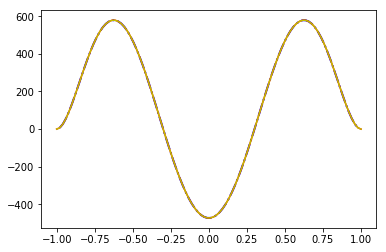

In [6]:
%matplotlib inline
from scipy.special import lpmv
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import pro_ang1
from Electromagnetics import specfun

m = 4
n = 6
c = 1.0
x = np.linspace(-1, 1, 100)

d_mn, d_inds = Get_Expansion_Coeff_d_mn(m, n, c)
print(d_mn)

y = np.zeros(len(x))
for i in range(len(d_mn)):
    y += d_mn[i]*lpmv(m, m+d_inds[i], x)

cv = specfun.segv(m, n, c, 1)[0]
z = np.array([specfun.aswfa(m, n, c, x[i], 1, cv)[0] for i in range(len(x))])

plt.plot(x, pro_ang1(m, n, c, x)[0], 'b-.', lw = 2)
plt.plot(x, y, 'r')
plt.plot(x, z, 'y')


I0:  (43357.65539194137, 5.3293937839205e-10)
I1:  (43357.65539194137, 5.3293937839205e-10)
I2:   43357.655391941444


-0.4215855152888361

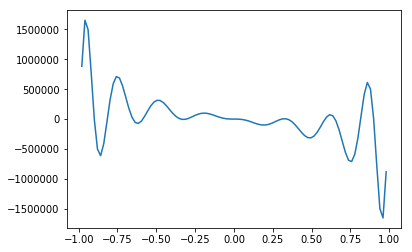

In [38]:
%matplotlib inline
from scipy.integrate import quadrature, quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import pro_ang1
from Electromagnetics import specfun

m = 3
n = 6
N = 7
c = 1.0

I0 = GetInt_Sm_mpn_Sm_mpN_x_quad1(c, m, n, N)
I1 = GetInt_Sm_mpn_Sm_mpN_x_quad2(c, m, n, N)
I2 = GetInt_Sm_mpn_Sm_mpN_x(c, m, n, N)

print("I0: ", I0)
print("I1: ", I1)
print("I2:  ", I2)

x = np.linspace(-1, 1, 100)
def f(x):
    return pro_ang1(m, m+n, c, x)[1]*pro_ang1(m, m+N, c, x)[0]*x
plt.plot(x, f(x))
f(0.99999)

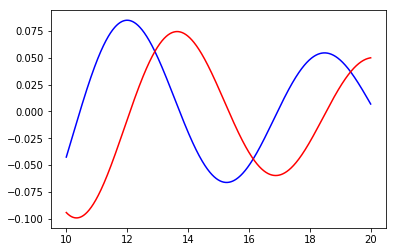

In [14]:
%matplotlib inline
from scipy.special import pro_rad1, pro_rad2
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(10, 20, 1000)
y = pro_rad1(2, 3, 1.0, x)[0]
z = pro_rad2(2, 3, 1.0, x)[0]
plt.plot(x, y, 'b')
plt.plot(x, z, 'r')



In [60]:
1j**2

(-1+0j)